# Scraping Books

In [1]:
import sys

import requests
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def fetch_page(page):
    """
    Fetches the page and returns the soup

    Parameters
    ----------
    page : int
        The number of the page to scrape
    """

    # Informational print
    print(f"Scraping page {page + 1}")

    # Create the response using a header for the language
    response = requests.get(
        f'http://books.toscrape.com/catalogue/page-{page + 1}.html',
        headers = {"Accept-Language":"en-US"}
    )

    # Create the soup
    soup = BeautifulSoup(response.content, "html.parser")

    return soup

In [3]:
def parse_rating(rating_classes):
    """
    Parses the rating classes and returns the rating

    Parameters
    ----------
    rating_classes : str
        The rating classes of the book: these are the classes of the stars element in the HTML

    Examples
    --------
    >>> rating_classes = ['star-rating', 'Three']
    >>> parse_rating(rating_classes)
    3
    """
    # Define the ratings: mapping from English to numerical
    ratings = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}
    # For each of the 5 possible ratings, check if it's in the rating classes
    for rating in ratings:
        if rating in rating_classes:
            return ratings[rating] # Found the rating, return the numerical value

In [4]:
def add_books_to_dict(soup, store):
    """
    Takes the soup, extracts Title, Price and Rating and adds those to the store.

    Parameters
    ----------
    soup : BeautifulSoup
        The soup to scrape
    store : dict
        The dictionary to store the information for Title, Price and Rating.
        The dictionary needs to have the keys 'Title', 'Price' and 'Rating'.
    """

    for book_html in soup.find_all(class_ = "product_pod"):
        # Find the title and price
        store['Title'].append(book_html.find("h3").find("a").string)
        store['Price'].append(float(book_html.find(class_ = "price_color").string.strip('£')))

        # Find the star rating and use parse_rating to convert it to numbers
        stars_html = book_html.find(class_ = "star-rating")
        store['Rating'].append(parse_rating(stars_html.attrs['class']))
        

In [5]:
books_dict = { 'Title': [], 'Price': [], 'Rating': [] }

In [6]:
def create_books_df(max_page):
    """
    Creates a DataFrame with the books from all the pages, up to a maximum
    number of pages

    Parameters
    ----------
    max_page : int
        The maximum number of pages to scrape

    """
    for page in range(max_page):
        # Get page from the soup and add it to the books_dict
        soup = fetch_page(page)
        add_books_to_dict(soup, books_dict)

    return pd.DataFrame(books_dict)


## Creating the `books_df`

In [7]:
books_df = create_books_df(50)
books_df.shape

Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10
Scraping page 11
Scraping page 12
Scraping page 13
Scraping page 14
Scraping page 15
Scraping page 16
Scraping page 17
Scraping page 18
Scraping page 19
Scraping page 20
Scraping page 21
Scraping page 22
Scraping page 23
Scraping page 24
Scraping page 25
Scraping page 26
Scraping page 27
Scraping page 28
Scraping page 29
Scraping page 30
Scraping page 31
Scraping page 32
Scraping page 33
Scraping page 34
Scraping page 35
Scraping page 36
Scraping page 37
Scraping page 38
Scraping page 39
Scraping page 40
Scraping page 41
Scraping page 42
Scraping page 43
Scraping page 44
Scraping page 45
Scraping page 46
Scraping page 47
Scraping page 48
Scraping page 49
Scraping page 50


(1000, 3)

In [8]:
books_df.head()

,Title,Price,Rating
0,A Light in the ...,51.77,3
1,Tipping the Velvet,53.74,1
2,Soumission,50.10,1
3,Sharp Objects,47.82,4
4,Sapiens: A Brief History ...,54.23,5


<Axes: xlabel='Rating'>

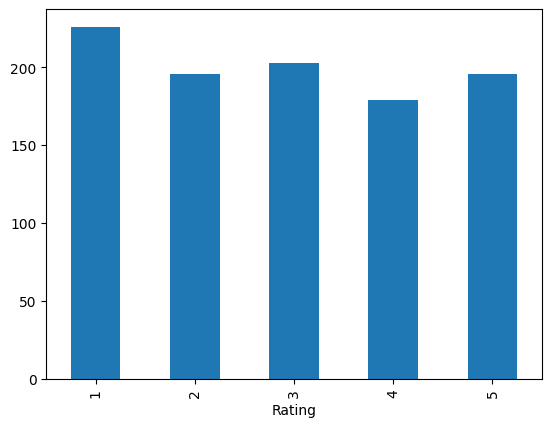

In [9]:
books_df.groupby("Rating").count()["Title"].plot(kind="bar")

<Axes: >

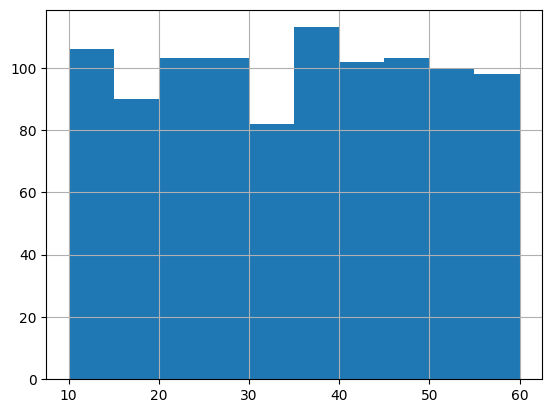

In [10]:
books_df['Price'].hist()

In [11]:
books_df.to_csv("books.csv")

In [12]:
from nbresult import ChallengeResult

result = ChallengeResult('books',
    columns=books_df.columns,
    title=str(books_df.loc[0,'Title']),
    price=books_df.loc[0,'Price'],
    rating=books_df.loc[0,'Rating']
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/dilay/.pyenv/versions/workintech/bin/python
cachedir: .pytest_cache
rootdir: /Users/dilay/Desktop/data-book-scraping/tests
plugins: dash-3.3.0, anyio-4.8.0, typeguard-4.4.2
collecting ... collected 5 items

test_books.py::TestBooks::test_books_df_columns_name PASSED              [ 20%]
test_books.py::TestBooks::test_books_df_columns_size PASSED              [ 40%]
test_books.py::TestBooks::test_first_book_price PASSED                   [ 60%]
test_books.py::TestBooks::test_first_book_rating PASSED                  [ 80%]
test_books.py::TestBooks::test_first_book_title PASSED                   [100%]

============================== 5 passed in 0.51s ===============================


💯 You can commit your code:

git add tests/books.pickle

git commit -m 'Completed books step'

git push origin master

